In [ ]:
import pandas as pd

**Importing dataset from two trials**

In [ ]:
exp1 = pd.read_csv("Data/exp1.csv")
exp1 = exp1.drop("Unnamed: 0", axis=1)
exp2 = pd.read_csv("Data/exp2.csv")
exp2 = exp2.drop("Unnamed: 0", axis=1)

/tmp/ipykernel_3329152/1566420057.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  exp1 = pd.read_csv("Data/exp1.csv")
/tmp/ipykernel_3329152/1566420057.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  exp2 = pd.read_csv("Data/exp2.csv")


**Selecting relevant columns and imputation**

In [ ]:
exp1 = exp1.drop(["CellType","Replicate","Event","FSC-A","SSC-A"], axis=1)
exp2 = exp2.drop(["CellType","Replicate","Event","FSC-A","SSC-A"], axis=1)

In [ ]:
exp1 = exp1.fillna("null")
exp2 = exp2.fillna("null")

In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

class CustomLabelEncoder(LabelEncoder):
    def __init__(self, custom_mapping=None, handle_unknown='ignore'):
        super().__init__()
        self.custom_mapping = custom_mapping
        self.handle_unknown = handle_unknown

    def fit(self, y):
        if self.custom_mapping:
            self.classes_ = np.array(list(self.custom_mapping.keys()))
            self.custom_mapping = {k: v for v, k in enumerate(self.classes_)}
        else:
            super().fit(y)
        return self

    def transform(self, y):
        if self.custom_mapping:
            return np.array([self.custom_mapping.get(item, -1 if self.handle_unknown == 'ignore' else self.custom_mapping[item]) for item in y])
        else:
            return super().transform(y)

    def fit_transform(self, y):
        return self.fit(y).transform(y)

    def inverse_transform(self, y):
        if self.custom_mapping:
            inverse_mapping = {v: k for k, v in self.custom_mapping.items()}
            return np.array([inverse_mapping.get(item, 'unknown' if self.handle_unknown == 'ignore' else inverse_mapping[item]) for item in y])
        else:
            return super().inverse_transform(y)

#labels = ['A2', 'E1', 'G4', 'N4', 'Q4', 'T4', 'V4', 'null']
custom_mapping = {'N4': 0, 'A2': 1, 'Q4': 2, 'T4':3, 'V4': 4, 'G4':5, 'E1':6, 'null':7 }

encoder = CustomLabelEncoder(custom_mapping=custom_mapping, handle_unknown='ignore')
exp1["Peptide"]=encoder.fit_transform(exp1["Peptide"])
exp2["Peptide"]=encoder.fit_transform(exp2["Peptide"])

**Extracting dataset from time-step 72 from both the trials**

In [ ]:
"""d_4_um_1 = exp1[exp1["Concentration"]=="1uM"]
d_4_um_1 = exp1[exp1["Time"]==4]
d_4_um_1 = d_4_um_1.drop(["Concentration","Time"], axis = 1)

d_12_um_1 = exp1[exp1["Concentration"]=="1uM"]
d_12_um_1 = exp1[exp1["Time"]==12]
d_12_um_1 = d_12_um_1.drop(["Concentration","Time"], axis = 1)

d_24_um_1 = exp1[exp1["Concentration"]=="1uM"]
d_24_um_1 = exp1[exp1["Time"]==24]
d_24_um_1 = d_24_um_1.drop(["Concentration","Time"], axis = 1)

d_30_um_1 = exp1[exp1["Concentration"]=="1uM"]
d_30_um_1 = exp1[exp1["Time"]==30]
d_30_um_1 = d_30_um_1.drop(["Concentration","Time"], axis = 1)

d_36_um_1 = exp1[exp1["Concentration"]=="1uM"]
d_36_um_1 = exp1[exp1["Time"]==36]
d_36_um_1 = d_36_um_1.drop(["Concentration","Time"], axis = 1)

d_48_um_1 = exp1[exp1["Concentration"]=="1uM"]
d_48_um_1 = exp1[exp1["Time"]==48]
d_48_um_1 = d_48_um_1.drop(["Concentration","Time"], axis = 1)

d_60_um_1 = exp1[exp1["Concentration"]=="1uM"]
d_60_um_1 = exp1[exp1["Time"]==60]
d_60_um_1 = d_60_um_1.drop(["Concentration","Time"], axis = 1)"""

d_72_um_1 = exp1[exp1["Concentration"]=="1uM"]
d_72_um_1 = exp1[exp1["Time"]==72]
d_72_um_1 = d_72_um_1.drop(["Concentration","Time"], axis = 1)

In [ ]:
"""d_4_um_2 = exp2[exp2["Concentration"]=="1uM"]
d_4_um_2 = exp2[exp2["Time"]==4]
d_4_um_2 = d_4_um_2.drop(["Concentration","Time"], axis = 1)

d_12_um_2 = exp2[exp2["Concentration"]=="1uM"]
d_12_um_2 = exp2[exp2["Time"]==12]
d_12_um_2 = d_12_um_2.drop(["Concentration","Time"], axis = 1)

d_24_um_2 = exp2[exp2["Concentration"]=="1uM"]
d_24_um_2 = exp2[exp2["Time"]==24]
d_24_um_2 = d_24_um_2.drop(["Concentration","Time"], axis = 1)

d_30_um_2 = exp2[exp2["Concentration"]=="1uM"]
d_30_um_2 = exp2[exp2["Time"]==30]
d_30_um_2 = d_30_um_2.drop(["Concentration","Time"], axis = 1)

d_36_um_2 = exp2[exp2["Concentration"]=="1uM"]
d_36_um_2 = exp2[exp2["Time"]==36]
d_36_um_2 = d_36_um_2.drop(["Concentration","Time"], axis = 1)

d_48_um_2 = exp2[exp2["Concentration"]=="1uM"]
d_48_um_2 = exp2[exp2["Time"]==48]
d_48_um_2 = d_48_um_2.drop(["Concentration","Time"], axis = 1)

d_60_um_2 = exp2[exp2["Concentration"]=="1uM"]
d_60_um_2 = exp2[exp2["Time"]==60]
d_60_um_2 = d_60_um_2.drop(["Concentration","Time"], axis = 1)
"""
d_72_um_2 = exp2[exp2["Concentration"]=="1uM"]
d_72_um_2 = exp2[exp2["Time"]==72]
d_72_um_2 = d_72_um_2.drop(["Concentration","Time"], axis = 1)

In [ ]:
d_72_um_1

,Peptide,CD25,CD38,Granzyme B,CD2,CD27,CD45RA,CD4,CD86,CXCR6,...,CD126,Proliferation,ICOS,IRF8,CD19,MHC-II,CD45,CD44,CX3CR1,CD8a
295649,0,277,277,296,136,591,303,258,361,238,...,296,495,365,371,259,293,685,384,374,738
295650,0,323,267,335,397,592,359,268,279,295,...,301,505,523,302,302,105,646,241,446,614
295651,0,300,268,411,236,650,333,241,283,323,...,343,417,535,456,313,110,694,255,572,664
295652,0,535,277,540,393,282,291,278,250,223,...,303,600,480,376,302,321,624,425,475,650
295653,0,651,256,467,559,301,294,238,256,317,...,303,631,660,316,252,379,589,568,438,713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042671,7,273,288,288,306,265,287,273,272,249,...,289,827,240,289,270,295,592,333,285,490
3042672,7,275,281,288,326,416,297,289,271,241,...,289,803,288,301,234,335,647,275,423,648
3042673,7,288,275,290,129,307,276,276,260,483,...,296,909,230,283,310,305,560,490,359,310
3042674,7,281,588,298,20,320,433,302,462,264,...,310,307,253,644,663,645,622,618,496,282


**Importing the required libraries**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import resample

min_class_count = d_72_um_1['Peptide'].value_counts().min()

downsampled_data = []

for label in d_72_um_1['Peptide'].unique():
    class_data = d_72_um_1[d_72_um_1['Peptide'] == label]
    downsampled_class_data = resample(class_data,
                                      replace=False,
                                      n_samples=min_class_count,
                                      random_state=42)
    downsampled_data.append(downsampled_class_data)

downsampled_data = pd.concat(downsampled_data)

print(downsampled_data['Peptide'].value_counts())
d_72_um_1 = downsampled_data
d_72_um_1

Peptide
0    17065
1    17065
2    17065
3    17065
4    17065
5    17065
6    17065
7    17065
Name: count, dtype: int64


,Peptide,CD25,CD38,Granzyme B,CD2,CD27,CD45RA,CD4,CD86,CXCR6,...,CD126,Proliferation,ICOS,IRF8,CD19,MHC-II,CD45,CD44,CX3CR1,CD8a
326663,0,581,300,533,566,352,325,282,231,249,...,306,656,585,352,364,229,598,543,428,646
309896,0,711,264,467,624,350,301,276,235,274,...,337,625,690,356,290,359,620,538,410,705
356457,0,665,249,524,482,267,296,269,281,298,...,322,572,703,426,219,328,648,555,540,701
328244,0,640,219,486,480,286,288,272,239,237,...,318,566,623,292,274,283,604,433,380,595
434822,0,299,263,309,330,554,279,254,286,296,...,370,611,485,306,227,279,680,399,465,750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038307,7,260,291,303,430,519,307,257,370,218,...,302,801,291,366,236,330,692,323,421,733
3041530,7,292,271,370,357,280,280,273,268,363,...,284,804,241,235,269,284,589,228,493,587
3011078,7,273,365,273,247,280,287,283,270,256,...,303,789,307,303,251,243,652,437,336,643
3018129,7,274,272,263,264,239,268,258,283,202,...,257,803,261,303,263,296,390,451,282,266


**Important feature identification for separating classes 2 and 3**

In [ ]:
mmscaler = MinMaxScaler()
comp_2_3_1 = pd.DataFrame(mmscaler.fit_transform(d_72_um_1[d_72_um_1["Peptide"].isin([2, 3])]))
comp_2_3_1.columns = d_72_um_1.columns
mmscaler = MinMaxScaler()
comp_2_3_2 = pd.DataFrame(mmscaler.fit_transform(d_72_um_2[d_72_um_2["Peptide"].isin([2, 3])]))
comp_2_3_2.columns = d_72_um_1.columns

**RFE using Random Forest Classifier for classes 2 and 3**



Accuracy: 0.7637
Precision: 0.6163
Recall: 0.8232
F1 score: 0.7049
Feature ranking:
[ 1 17  1  8  3  5 22 21 15 12  7 18 13 19 20  4  9 11 16 14  2 10  1  6]
Selected features:
[ 0  2 22]
CD25
Granzyme B
CX3CR1


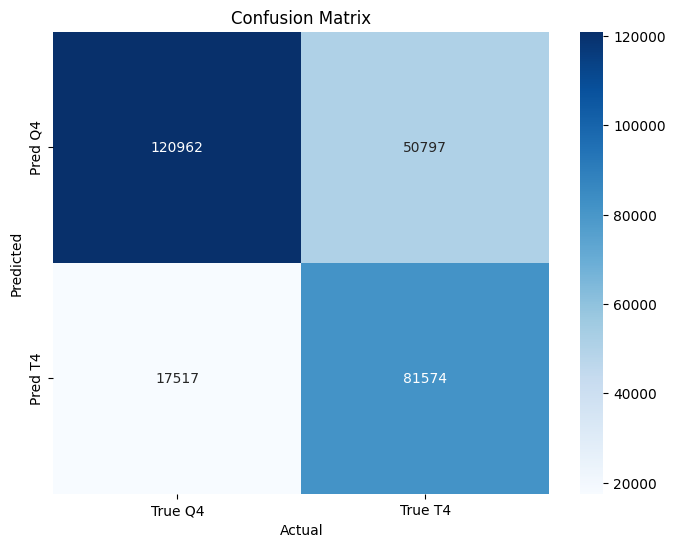

In [ ]:
model = RandomForestClassifier()

n_features_to_select = 3
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
rfe.fit(comp_2_3_1.drop("Peptide", axis = 1), comp_2_3_1["Peptide"])

X_train_rfe = rfe.transform(comp_2_3_1.drop("Peptide", axis = 1))
X_val_rfe = rfe.transform(comp_2_3_2.drop("Peptide", axis = 1))

model.fit(X_train_rfe, comp_2_3_1["Peptide"])

y_pred = model.predict(X_val_rfe)
accuracy = balanced_accuracy_score(comp_2_3_2["Peptide"], y_pred)
precision = precision_score(comp_2_3_2["Peptide"], y_pred)
recall = recall_score(comp_2_3_2["Peptide"], y_pred)
f1 = f1_score(comp_2_3_2["Peptide"], y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 score: {f1:.4f}')

print("Feature ranking:")
print(rfe.ranking_)

selected_features = np.where(rfe.support_)[0]
print("Selected features:")
print(selected_features)

for i in selected_features:
  print(comp_2_3_1.columns[1:][i])

cm = confusion_matrix(comp_2_3_2["Peptide"].astype(int), y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['True Q4', 'True T4'], yticklabels=['Pred Q4', 'Pred T4'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

**TabNetClassifier for classes 2 and 3**

/home/durga/durga_env/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/home/durga/durga_env/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.68754 |  0:00:02s
epoch 1  | loss: 0.47271 |  0:00:05s
epoch 2  | loss: 0.41748 |  0:00:07s
epoch 3  | loss: 0.39151 |  0:00:10s
epoch 4  | loss: 0.3699  |  0:00:12s
epoch 5  | loss: 0.35275 |  0:00:15s
epoch 6  | loss: 0.33953 |  0:00:18s
epoch 7  | loss: 0.32998 |  0:00:21s
epoch 8  | loss: 0.31809 |  0:00:23s
epoch 9  | loss: 0.30737 |  0:00:26s
epoch 10 | loss: 0.30175 |  0:00:29s
epoch 11 | loss: 0.29932 |  0:00:32s
epoch 12 | loss: 0.29518 |  0:00:34s
epoch 13 | loss: 0.29101 |  0:00:37s
epoch 14 | loss: 0.28843 |  0:00:40s
epoch 15 | loss: 0.28643 |  0:00:43s
epoch 16 | loss: 0.28335 |  0:00:45s
epoch 17 | loss: 0.28019 |  0:00:48s
epoch 18 | loss: 0.28446 |  0:00:51s
epoch 19 | loss: 0.28211 |  0:00:54s
epoch 20 | loss: 0.28102 |  0:00:57s
epoch 21 | loss: 0.28198 |  0:00:59s
epoch 22 | loss: 0.28065 |  0:01:02s
epoch 23 | loss: 0.2779  |  0:01:04s
epoch 24 | loss: 0.27251 |  0:01:07s
epoch 25 | loss: 0.27447 |  0:01:10s
epoch 26 | loss: 0.27415 |  0:01:12s
e

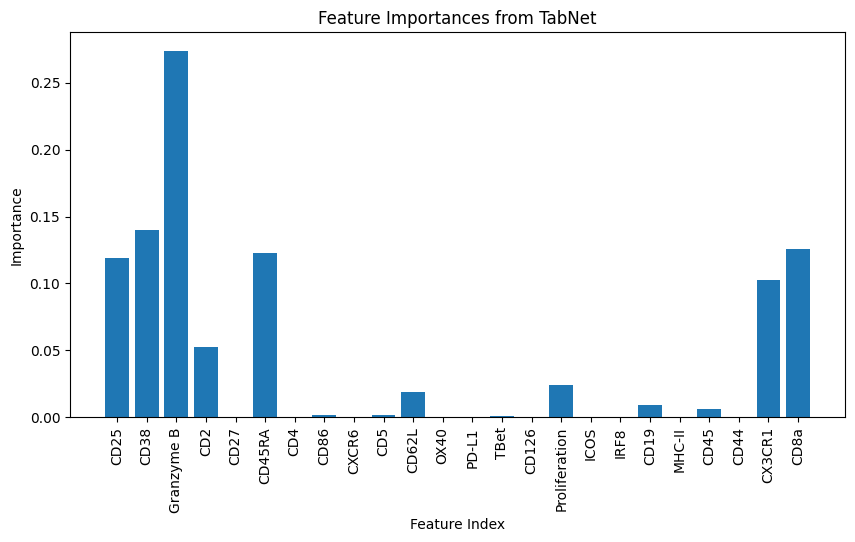

In [ ]:
clf = TabNetClassifier()

clf.fit(
    comp_2_3_1.drop("Peptide", axis = 1).values,comp_2_3_1["Peptide"],
    max_epochs=30,
    patience=10,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=1,
    drop_last=False
)

y_pred = clf.predict(comp_2_3_2.drop("Peptide", axis = 1).values)

accuracy = accuracy_score(comp_2_3_2["Peptide"], y_pred)
print(f'Accuracy: {accuracy}')

import matplotlib.pyplot as plt
feature_importances = clf.feature_importances_
print("Feature Importances:")

plt.figure(figsize=(10, 5))
plt.bar(comp_2_3_2.columns[1:], feature_importances)
plt.xlabel('Feature Index')
plt.xticks(rotation=90)
plt.ylabel('Importance')
plt.title('Feature Importances from TabNet')
plt.show()



**Visualizing the density of features**

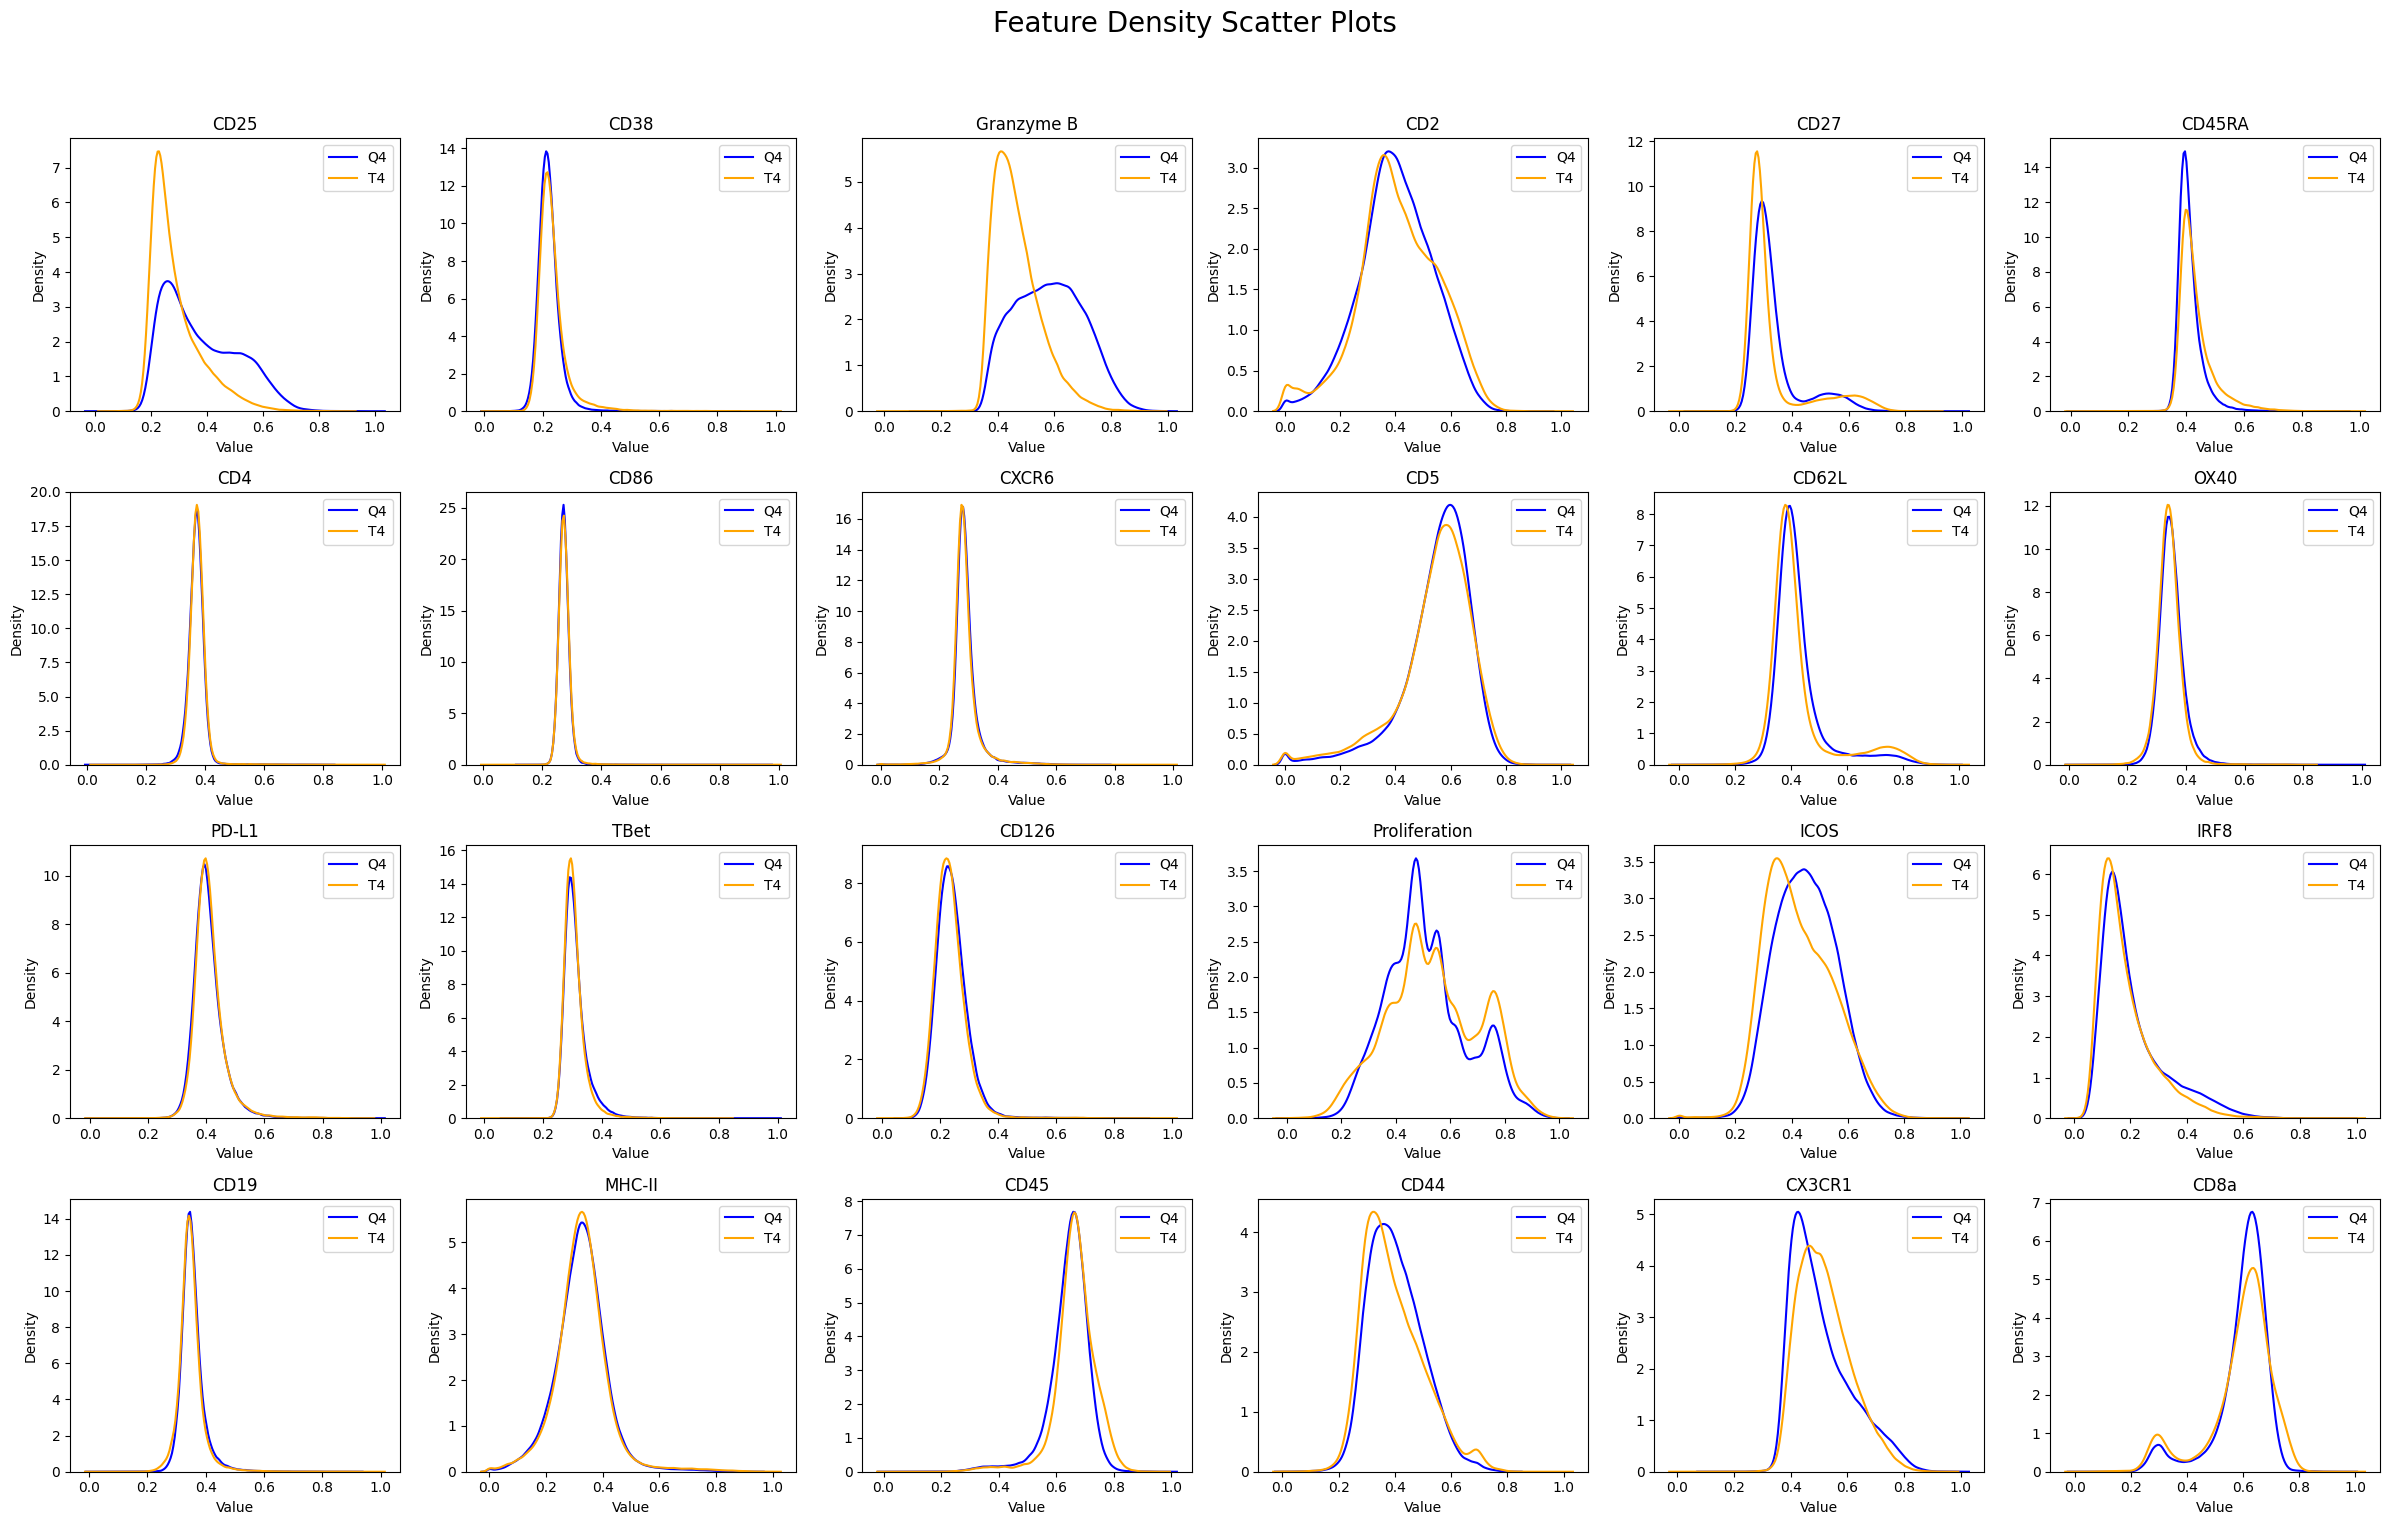

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
dataset1 = comp_2_3_2[comp_2_3_2["Peptide"]==0].drop("Peptide", axis=1)
dataset2 = comp_2_3_2[comp_2_3_2["Peptide"]==1].drop("Peptide", axis=1)

features = dataset1.columns

warnings.filterwarnings("ignore")

fig, axes = plt.subplots(4, 6, figsize=(24, 16))
fig.suptitle('Feature Density Scatter Plots', fontsize=20)

# Iterate over features and create scatter plots
for i, feature in enumerate(features):
  row, col = divmod(i, 6)
  ax = axes[row, col]
  sns.kdeplot(dataset1[feature], ax=ax, label='Q4', color='blue', shade=False)
  sns.kdeplot(dataset2[feature], ax=ax, label='T4', color='orange', shade=False)
  ax.set_title(feature)
  ax.set_xlabel('Value')
  ax.set_ylabel('Density')
  ax.legend()

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**Important feature identification for separating classes 2 and 4**

In [ ]:
mmscaler = MinMaxScaler()
comp_2_4_1 = pd.DataFrame(mmscaler.fit_transform(d_72_um_1[d_72_um_1["Peptide"].isin([2, 4])]))
comp_2_4_1.columns = d_72_um_1.columns
mmscaler = MinMaxScaler()
comp_2_4_2 = pd.DataFrame(mmscaler.fit_transform(d_72_um_2[d_72_um_2["Peptide"].isin([2, 4])]))
comp_2_4_2.columns = d_72_um_2.columns

**RFE using Random Forest Classifier for classes 2 and 4**



Accuracy: 0.7636
Precision: 0.5547
Recall: 0.7813
F1 score: 0.6488
Feature ranking:
[ 1 16  1  2  8  3 19 21 13  9 15 18 20 17 22  5  4 12 14 11  6 10  1  7]
Selected features:
[ 0  2 22]
CD25
Granzyme B
CX3CR1


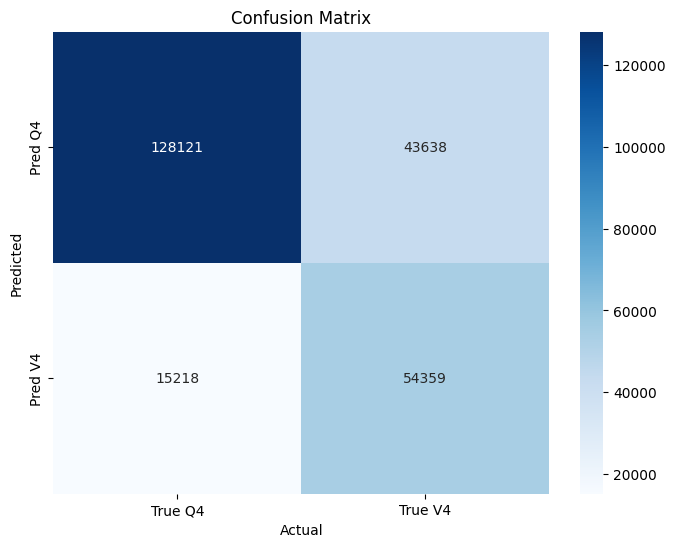

In [ ]:
model = RandomForestClassifier()

n_features_to_select = 3
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
rfe.fit(comp_2_4_1.drop("Peptide", axis = 1), comp_2_4_1["Peptide"])

X_train_rfe = rfe.transform(comp_2_4_1.drop("Peptide", axis = 1))
X_val_rfe = rfe.transform(comp_2_4_2.drop("Peptide", axis = 1))

model.fit(X_train_rfe, comp_2_4_1["Peptide"])

y_pred = model.predict(X_val_rfe)
accuracy = balanced_accuracy_score(comp_2_4_2["Peptide"], y_pred)
precision = precision_score(comp_2_4_2["Peptide"], y_pred)
recall = recall_score(comp_2_4_2["Peptide"], y_pred)
f1 = f1_score(comp_2_4_2["Peptide"], y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 score: {f1:.4f}')

print("Feature ranking:")
print(rfe.ranking_)

selected_features = np.where(rfe.support_)[0]
print("Selected features:")
print(selected_features)

for i in selected_features:
  print(comp_2_4_1.columns[1:][i])

cm = confusion_matrix(comp_2_4_2["Peptide"].astype(int), y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['True Q4', 'True V4'], yticklabels=['Pred Q4', 'Pred V4'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

**TabNetClassifier for classes 2 and 4**

epoch 0  | loss: 0.59008 |  0:00:02s
epoch 1  | loss: 0.39571 |  0:00:05s
epoch 2  | loss: 0.33591 |  0:00:07s
epoch 3  | loss: 0.30851 |  0:00:10s
epoch 4  | loss: 0.28958 |  0:00:12s
epoch 5  | loss: 0.28105 |  0:00:14s
epoch 6  | loss: 0.2682  |  0:00:17s
epoch 7  | loss: 0.26001 |  0:00:19s
epoch 8  | loss: 0.25286 |  0:00:22s
epoch 9  | loss: 0.25026 |  0:00:24s
epoch 10 | loss: 0.24135 |  0:00:27s
epoch 11 | loss: 0.2369  |  0:00:29s
epoch 12 | loss: 0.23356 |  0:00:32s
epoch 13 | loss: 0.23276 |  0:00:34s
epoch 14 | loss: 0.23581 |  0:00:37s
epoch 15 | loss: 0.23219 |  0:00:39s
epoch 16 | loss: 0.22971 |  0:00:42s
epoch 17 | loss: 0.22522 |  0:00:44s
epoch 18 | loss: 0.22536 |  0:00:46s
epoch 19 | loss: 0.22463 |  0:00:49s
epoch 20 | loss: 0.2227  |  0:00:51s
epoch 21 | loss: 0.21885 |  0:00:54s
epoch 22 | loss: 0.22283 |  0:00:56s
epoch 23 | loss: 0.21941 |  0:00:59s
epoch 24 | loss: 0.21968 |  0:01:01s
epoch 25 | loss: 0.2191  |  0:01:04s
epoch 26 | loss: 0.21559 |  0:01:06s
e

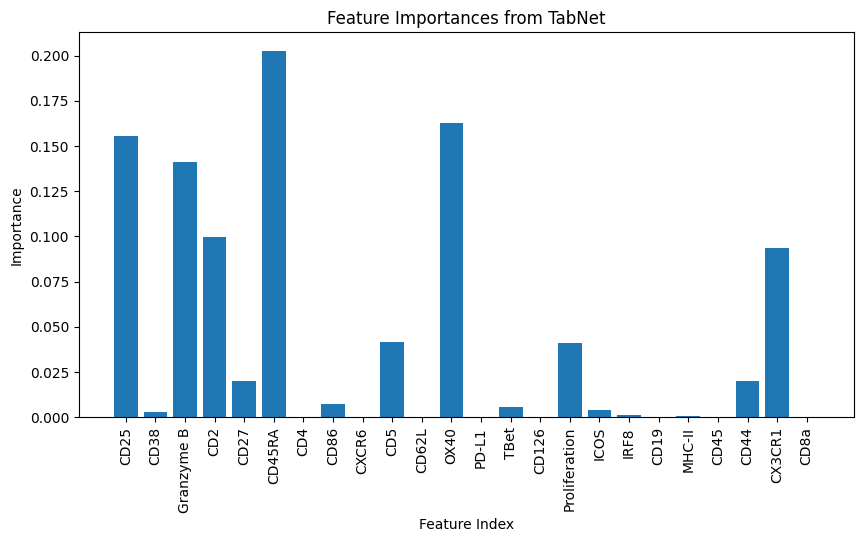

In [ ]:
clf = TabNetClassifier()

clf.fit(
    comp_2_4_1.drop("Peptide", axis = 1).values,comp_2_4_1["Peptide"],
    max_epochs=30,
    patience=10,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=1,
    drop_last=False
)

y_pred = clf.predict(comp_2_4_2.drop("Peptide", axis = 1).values)

accuracy = balanced_accuracy_score(comp_2_4_2["Peptide"], y_pred)
print(f'Accuracy: {accuracy}')

import matplotlib.pyplot as plt
feature_importances = clf.feature_importances_
print("Feature Importances:")

plt.figure(figsize=(10, 5))
plt.bar(comp_2_4_2.columns[1:], feature_importances)
plt.xlabel('Feature Index')
plt.xticks(rotation=90)
plt.ylabel('Importance')
plt.title('Feature Importances from TabNet')
plt.show()



**Visualizing the density of features**

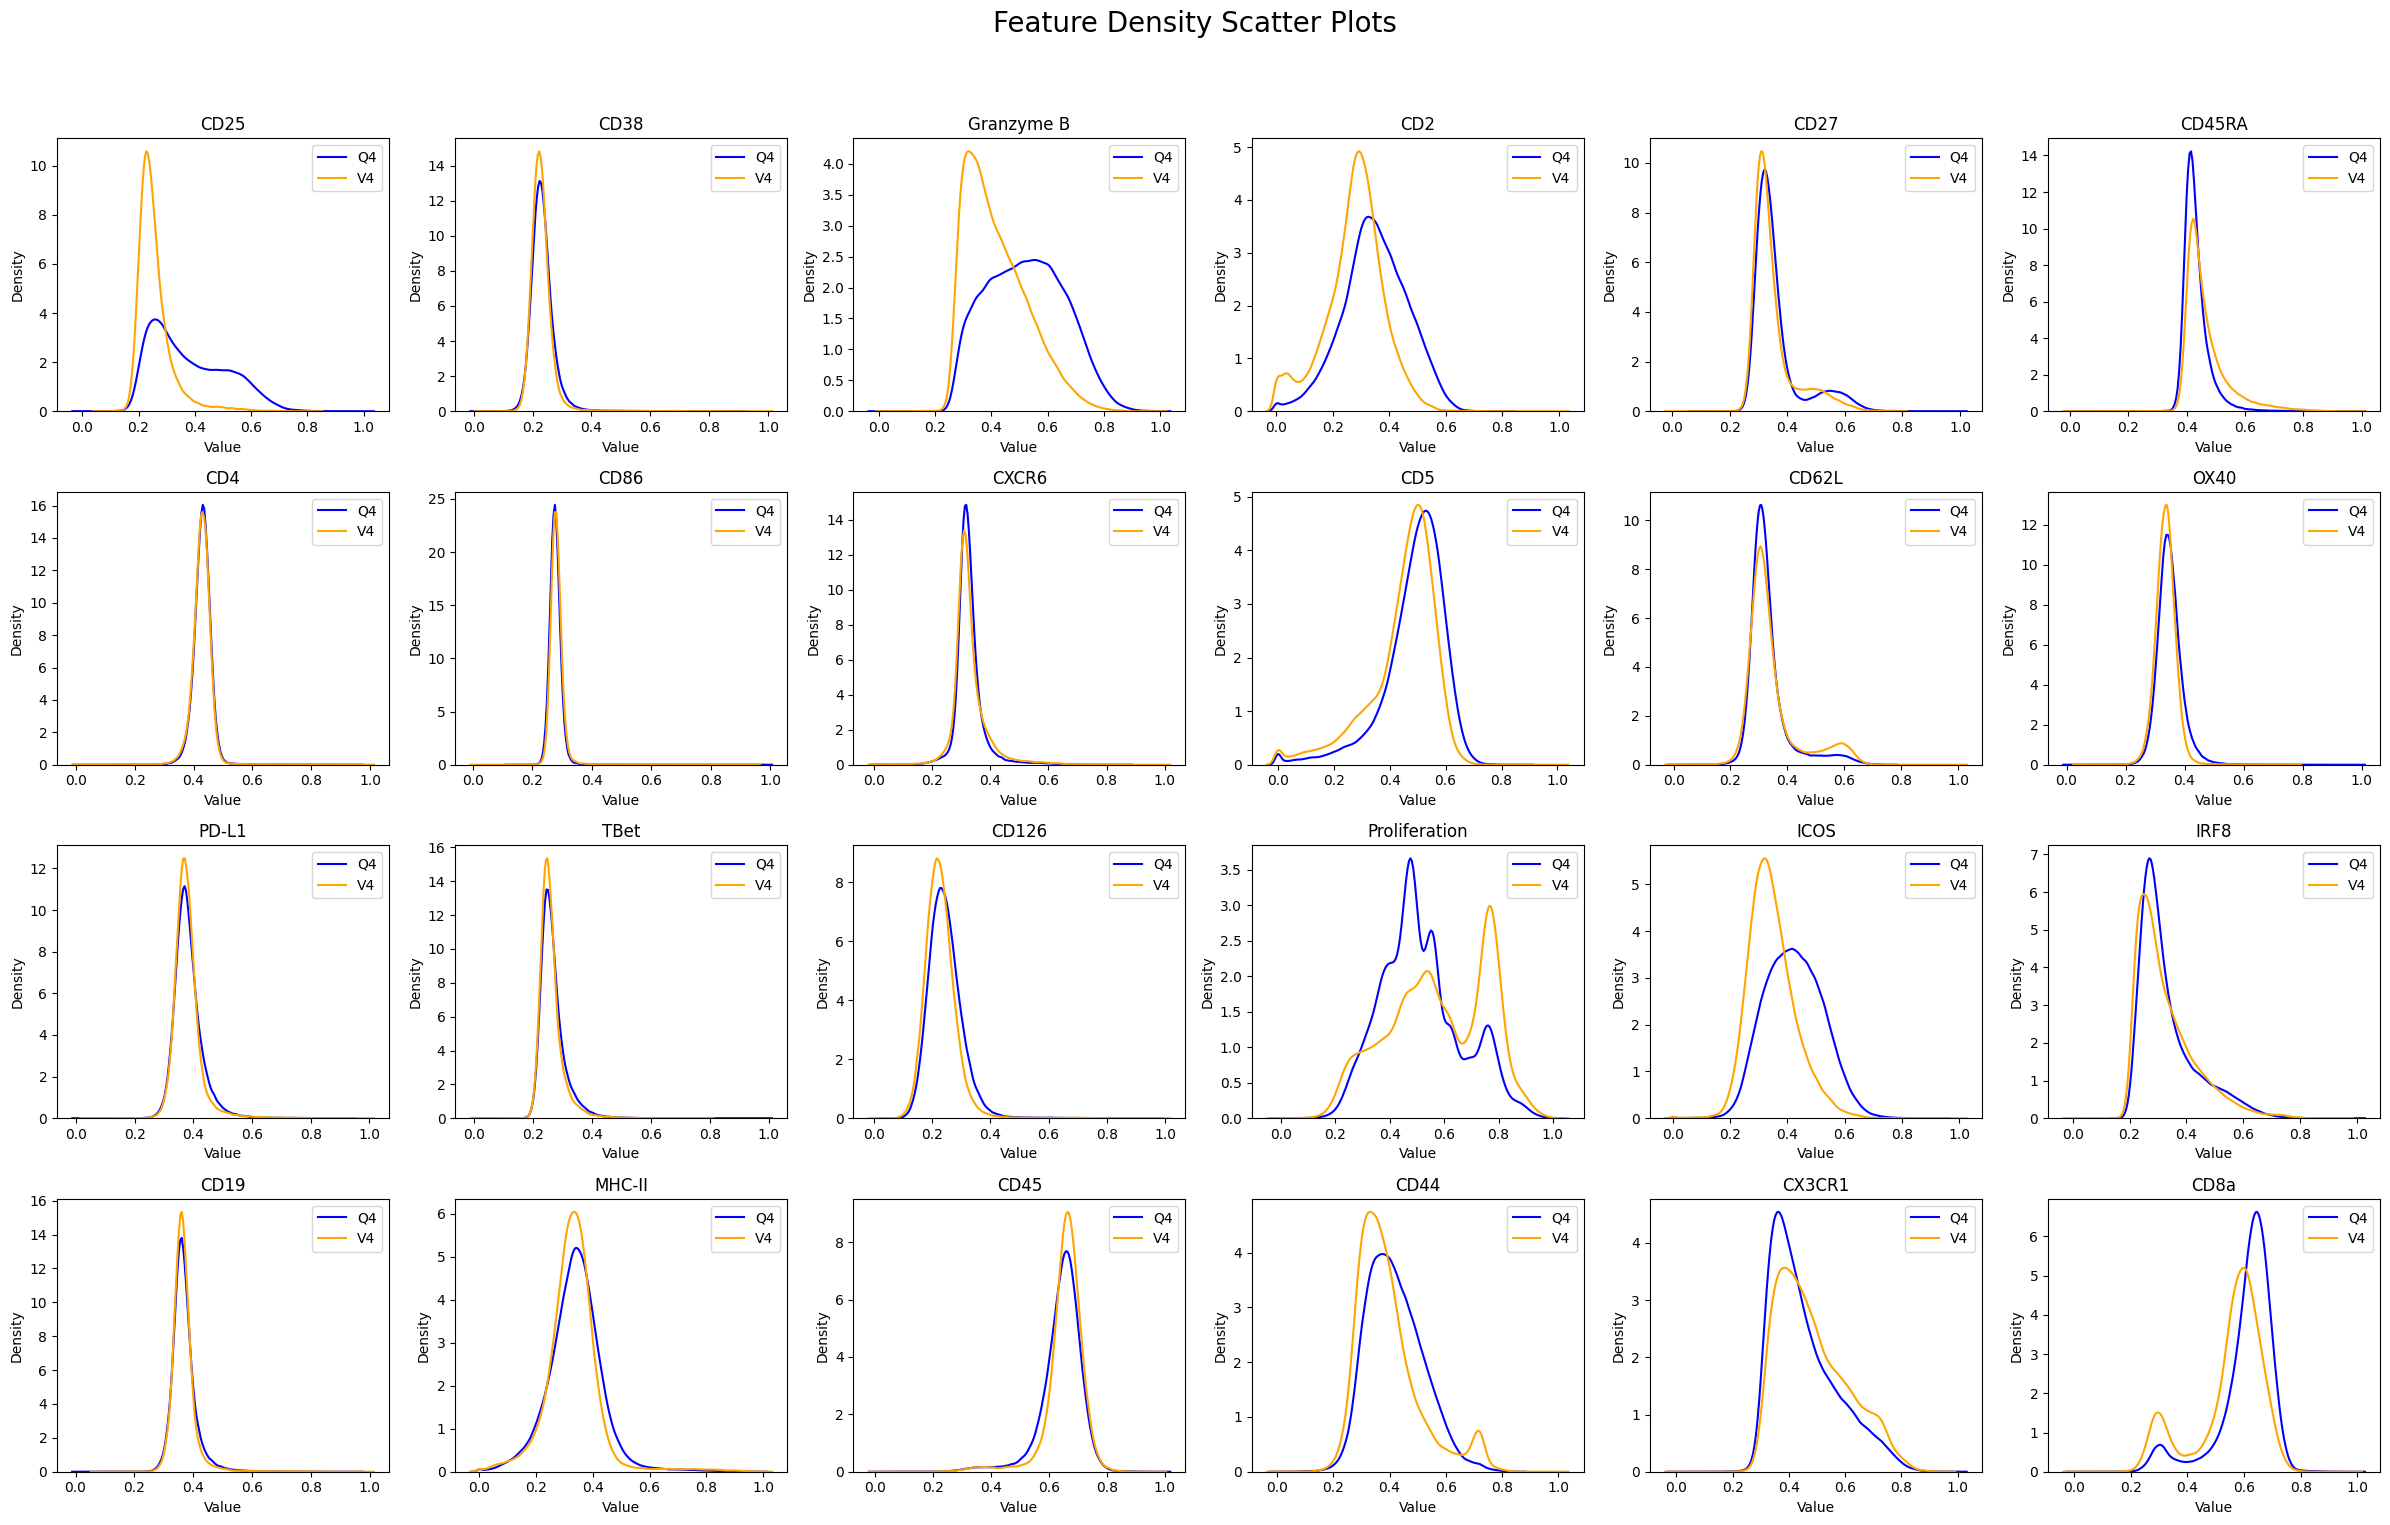

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
dataset1 = comp_2_4_2[comp_2_4_2["Peptide"]==0].drop("Peptide", axis=1)
dataset2 = comp_2_4_2[comp_2_4_2["Peptide"]==1].drop("Peptide", axis=1)

features = dataset1.columns

warnings.filterwarnings("ignore")

fig, axes = plt.subplots(4, 6, figsize=(24, 16))
fig.suptitle('Feature Density Scatter Plots', fontsize=20)

# Iterate over features and create scatter plots
for i, feature in enumerate(features):
  row, col = divmod(i, 6)
  ax = axes[row, col]
  sns.kdeplot(dataset1[feature], ax=ax, label='Q4', color='blue', shade=False)
  sns.kdeplot(dataset2[feature], ax=ax, label='V4', color='orange', shade=False)
  ax.set_title(feature)
  ax.set_xlabel('Value')
  ax.set_ylabel('Density')
  ax.legend()

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**Important feature identification for separating classes 2 and 5**

In [ ]:
mmscaler = MinMaxScaler()
comp_2_5_1 = pd.DataFrame(mmscaler.fit_transform(d_72_um_1[d_72_um_1["Peptide"].isin([2, 5])]))
comp_2_5_1.columns = d_72_um_1.columns
mmscaler = MinMaxScaler()
comp_2_5_2 = pd.DataFrame(mmscaler.fit_transform(d_72_um_2[d_72_um_2["Peptide"].isin([2, 5])]))
comp_2_5_2.columns = d_72_um_2.columns

**RFE using Random Forest Classifier for classes 2 and 5**



Accuracy: 1.0000
Precision: 0.0000
Recall: 0.0000
F1 score: 0.0000
Feature ranking:
[22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1  1  1]
Selected features:
[21 22 23]
CD44
CX3CR1
CD8a


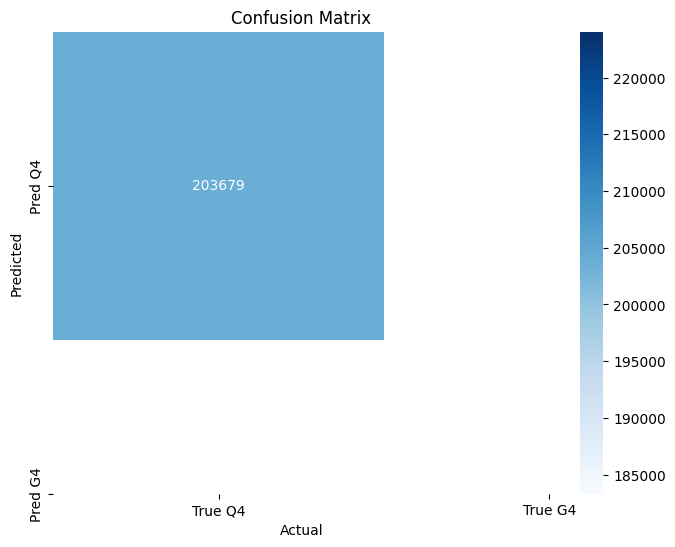

In [ ]:
model = RandomForestClassifier()

n_features_to_select = 3
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
rfe.fit(comp_2_5_1.drop("Peptide", axis = 1), comp_2_5_1["Peptide"].astype(int))

X_train_rfe = rfe.transform(comp_2_5_1.drop("Peptide", axis = 1))
X_val_rfe = rfe.transform(comp_2_5_2.drop("Peptide", axis = 1))

model.fit(X_train_rfe, comp_2_5_1["Peptide"].astype(int))

y_pred = model.predict(X_val_rfe)
accuracy = balanced_accuracy_score(comp_2_5_2["Peptide"].astype(int), y_pred)
precision = precision_score(comp_2_5_2["Peptide"].astype(int), y_pred)
recall = recall_score(comp_2_5_2["Peptide"].astype(int), y_pred)
f1 = f1_score(comp_2_5_2["Peptide"].astype(int), y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 score: {f1:.4f}')

print("Feature ranking:")
print(rfe.ranking_)

selected_features = np.where(rfe.support_)[0]
print("Selected features:")
print(selected_features)

for i in selected_features:
  print(comp_2_5_1.columns[1:][i])

cm = confusion_matrix(comp_2_5_2["Peptide"].astype(int), y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['True Q4', 'True G4'], yticklabels=['Pred Q4', 'Pred G4'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

**TabNetClassifier for classes 2 and 5**

epoch 0  | loss: 0.00051 |  0:00:02s
epoch 1  | loss: 0.00016 |  0:00:04s
epoch 2  | loss: 0.00011 |  0:00:07s
epoch 3  | loss: 8e-05   |  0:00:09s
epoch 4  | loss: 5e-05   |  0:00:12s
epoch 5  | loss: 5e-05   |  0:00:14s
epoch 6  | loss: 4e-05   |  0:00:17s
epoch 7  | loss: 4e-05   |  0:00:19s
epoch 8  | loss: 5e-05   |  0:00:22s
epoch 9  | loss: 4e-05   |  0:00:24s
epoch 10 | loss: 4e-05   |  0:00:27s
epoch 11 | loss: 3e-05   |  0:00:29s
epoch 12 | loss: 3e-05   |  0:00:32s
epoch 13 | loss: 3e-05   |  0:00:34s
epoch 14 | loss: 3e-05   |  0:00:37s
epoch 15 | loss: 2e-05   |  0:00:39s
epoch 16 | loss: 2e-05   |  0:00:41s
epoch 17 | loss: 2e-05   |  0:00:44s
epoch 18 | loss: 3e-05   |  0:00:47s
epoch 19 | loss: 2e-05   |  0:00:49s
epoch 20 | loss: 2e-05   |  0:00:52s
epoch 21 | loss: 2e-05   |  0:00:55s
epoch 22 | loss: 2e-05   |  0:00:57s
epoch 23 | loss: 2e-05   |  0:01:00s
epoch 24 | loss: 2e-05   |  0:01:02s
epoch 25 | loss: 2e-05   |  0:01:04s
epoch 26 | loss: 2e-05   |  0:01:07s
e

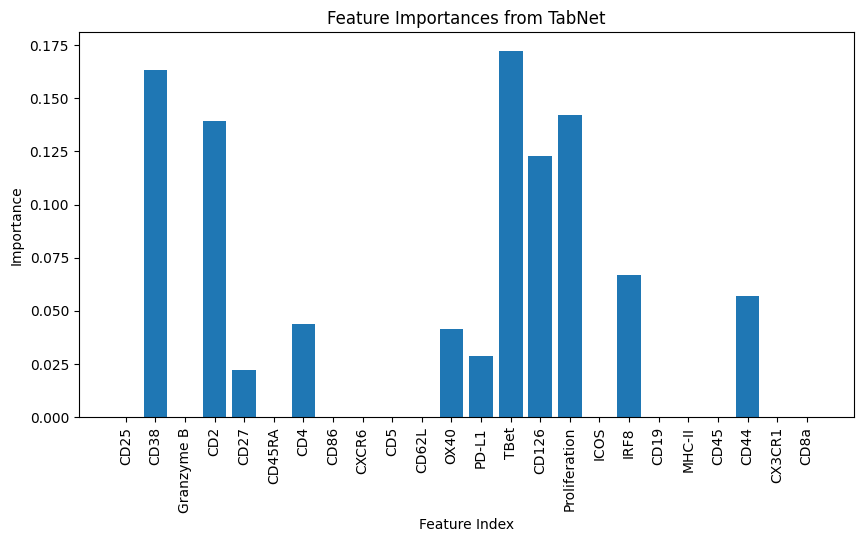

In [ ]:
clf = TabNetClassifier()

clf.fit(
    comp_2_5_1.drop("Peptide", axis = 1).values,comp_2_5_1["Peptide"].astype(int),
    max_epochs=30,
    patience=10,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=1,
    drop_last=False
)

y_pred = clf.predict(comp_2_5_2.drop("Peptide", axis = 1).values)

accuracy = balanced_accuracy_score(comp_2_5_2["Peptide"].astype(int), y_pred)
print(f'Accuracy: {accuracy}')

import matplotlib.pyplot as plt
feature_importances = clf.feature_importances_
print("Feature Importances:")

plt.figure(figsize=(10, 5))
plt.bar(comp_2_5_2.columns[1:], feature_importances)
plt.xlabel('Feature Index')
plt.xticks(rotation=90)
plt.ylabel('Importance')
plt.title('Feature Importances from TabNet')
plt.show()



**Visualizing the density of features**

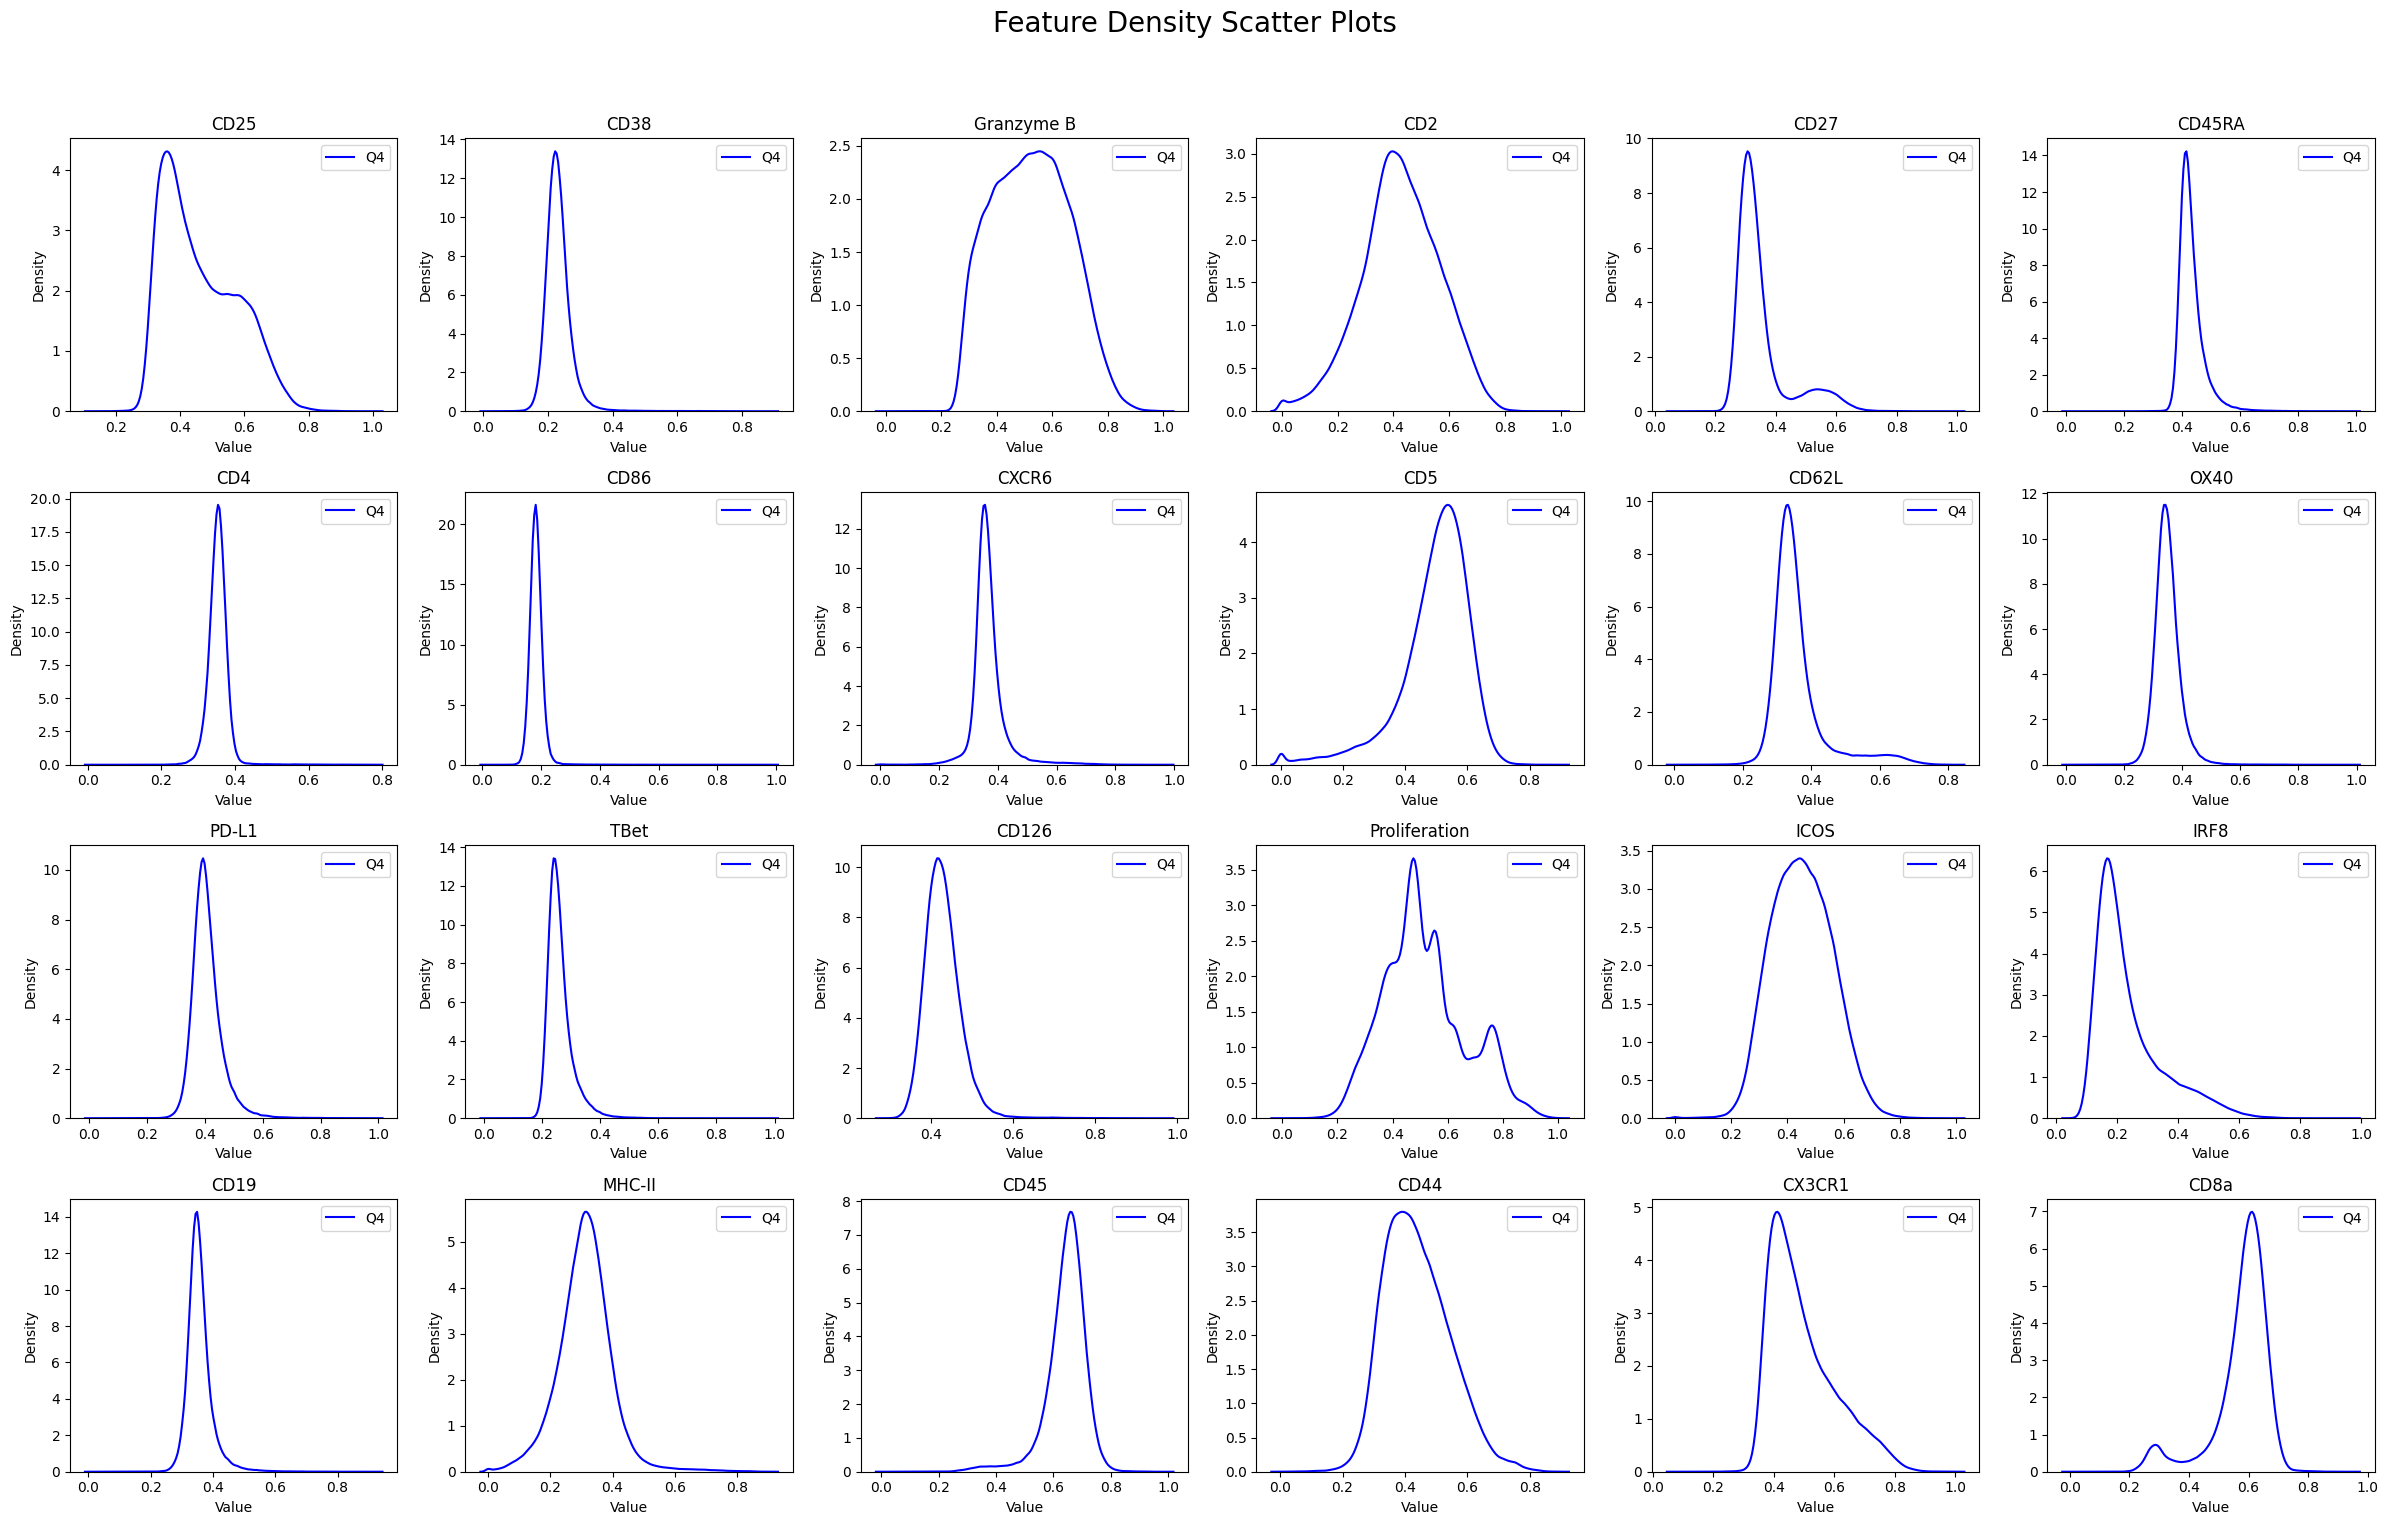

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
dataset1 = comp_2_5_2[comp_2_5_2["Peptide"]==0].drop("Peptide", axis=1)
dataset2 = comp_2_5_2[comp_2_5_2["Peptide"]==1].drop("Peptide", axis=1)

features = dataset1.columns

warnings.filterwarnings("ignore")

fig, axes = plt.subplots(4, 6, figsize=(24, 16))
fig.suptitle('Feature Density Scatter Plots', fontsize=20)

# Iterate over features and create scatter plots
for i, feature in enumerate(features):
  row, col = divmod(i, 6)
  ax = axes[row, col]
  sns.kdeplot(dataset1[feature], ax=ax, label='Q4', color='blue', shade=False)
  sns.kdeplot(dataset2[feature], ax=ax, label='G4', color='orange', shade=False)
  ax.set_title(feature)
  ax.set_xlabel('Value')
  ax.set_ylabel('Density')
  ax.legend()

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**Important feature identification for separating classes 2 and 6**

In [ ]:
mmscaler = MinMaxScaler()
comp_2_6_1 = pd.DataFrame(mmscaler.fit_transform(d_72_um_1[d_72_um_1["Peptide"].isin([2, 6])]))
comp_2_6_1.columns = d_72_um_1.columns
mmscaler = MinMaxScaler()
comp_2_6_2 = pd.DataFrame(mmscaler.fit_transform(d_72_um_2[d_72_um_2["Peptide"].isin([2, 6])]))
comp_2_6_2.columns = d_72_um_2.columns

**RFE using Random Forest Classifier for classes 2 and 6**



Accuracy: 0.9094
Precision: 0.5122
Recall: 0.9306
F1 score: 0.6607
Feature ranking:
[ 3 15  1  2 11 12 18 22 10  5 14 19 20 16 21  1  6  8 17 13  9  7  4  1]
Selected features:
[ 2 15 23]
Granzyme B
Proliferation
CD8a


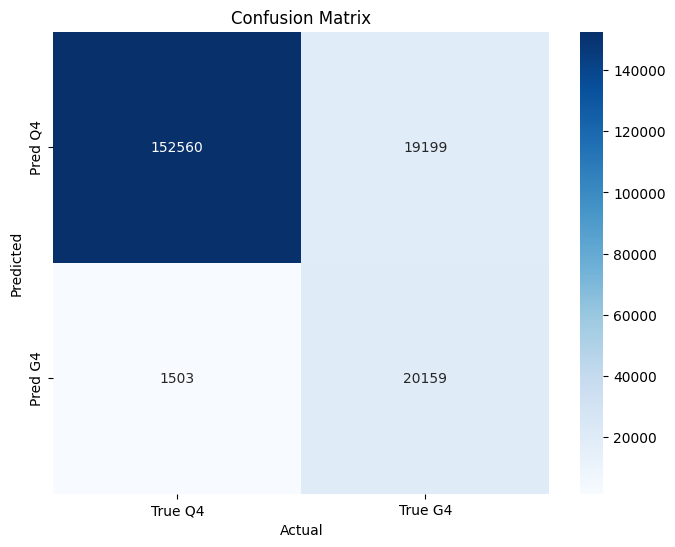

In [ ]:
model = RandomForestClassifier()

n_features_to_select = 3
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
rfe.fit(comp_2_6_1.drop("Peptide", axis = 1), comp_2_6_1["Peptide"].astype(int))

X_train_rfe = rfe.transform(comp_2_6_1.drop("Peptide", axis = 1))
X_val_rfe = rfe.transform(comp_2_6_2.drop("Peptide", axis = 1))

model.fit(X_train_rfe, comp_2_6_1["Peptide"].astype(int))

y_pred = model.predict(X_val_rfe)
accuracy = balanced_accuracy_score(comp_2_6_2["Peptide"].astype(int), y_pred)
precision = precision_score(comp_2_6_2["Peptide"].astype(int), y_pred)
recall = recall_score(comp_2_6_2["Peptide"].astype(int), y_pred)
f1 = f1_score(comp_2_6_2["Peptide"].astype(int), y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 score: {f1:.4f}')

print("Feature ranking:")
print(rfe.ranking_)

selected_features = np.where(rfe.support_)[0]
print("Selected features:")
print(selected_features)

for i in selected_features:
  print(comp_2_6_1.columns[1:][i])

cm = confusion_matrix(comp_2_6_2["Peptide"].astype(int), y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['True Q4', 'True G4'], yticklabels=['Pred Q4', 'Pred G4'])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

**TabNetClassifier for classes 2 and 6**

epoch 0  | loss: 0.34999 |  0:00:02s
epoch 1  | loss: 0.21304 |  0:00:05s
epoch 2  | loss: 0.1935  |  0:00:07s
epoch 3  | loss: 0.1792  |  0:00:10s
epoch 4  | loss: 0.16325 |  0:00:12s
epoch 5  | loss: 0.15137 |  0:00:15s
epoch 6  | loss: 0.14801 |  0:00:17s
epoch 7  | loss: 0.1457  |  0:00:20s
epoch 8  | loss: 0.14391 |  0:00:22s
epoch 9  | loss: 0.14176 |  0:00:25s
epoch 10 | loss: 0.13845 |  0:00:27s
epoch 11 | loss: 0.13665 |  0:00:30s
epoch 12 | loss: 0.13693 |  0:00:32s
epoch 13 | loss: 0.13505 |  0:00:34s
epoch 14 | loss: 0.13615 |  0:00:37s
epoch 15 | loss: 0.13661 |  0:00:39s
epoch 16 | loss: 0.13563 |  0:00:42s
epoch 17 | loss: 0.13804 |  0:00:45s
epoch 18 | loss: 0.13959 |  0:00:47s
epoch 19 | loss: 0.13277 |  0:00:50s
epoch 20 | loss: 0.13422 |  0:00:52s
epoch 21 | loss: 0.13404 |  0:00:55s
epoch 22 | loss: 0.13213 |  0:00:57s
epoch 23 | loss: 0.13024 |  0:00:59s
epoch 24 | loss: 0.13146 |  0:01:02s
epoch 25 | loss: 0.13005 |  0:01:04s
epoch 26 | loss: 0.13096 |  0:01:07s
e

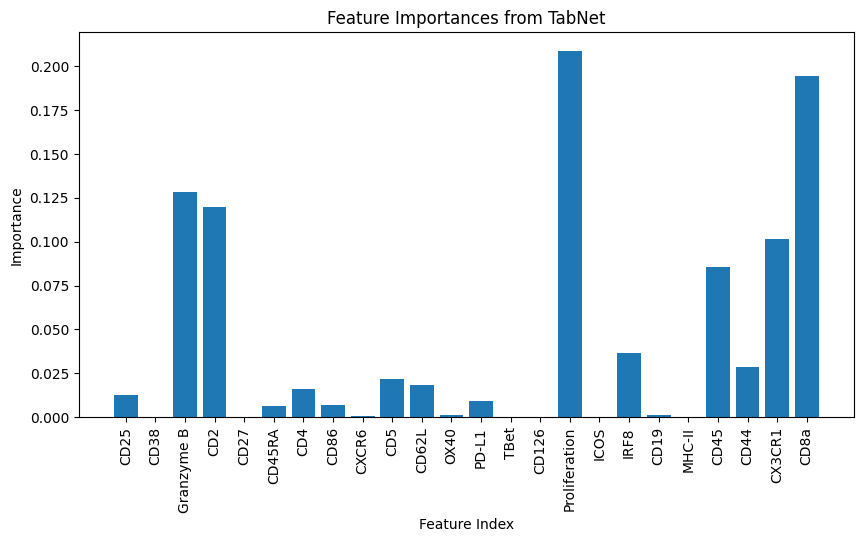

In [ ]:
clf = TabNetClassifier()

clf.fit(
    comp_2_6_1.drop("Peptide", axis = 1).values,comp_2_6_1["Peptide"].astype(int),
    max_epochs=30,
    patience=10,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=1,
    drop_last=False
)

y_pred = clf.predict(comp_2_6_2.drop("Peptide", axis = 1).values)

accuracy = balanced_accuracy_score(comp_2_6_2["Peptide"].astype(int), y_pred)
print(f'Accuracy: {accuracy}')

import matplotlib.pyplot as plt
feature_importances = clf.feature_importances_
print("Feature Importances:")

plt.figure(figsize=(10, 5))
plt.bar(comp_2_6_2.columns[1:], feature_importances)
plt.xlabel('Feature Index')
plt.xticks(rotation=90)
plt.ylabel('Importance')
plt.title('Feature Importances from TabNet')
plt.show()



**Visualizing the density of features**

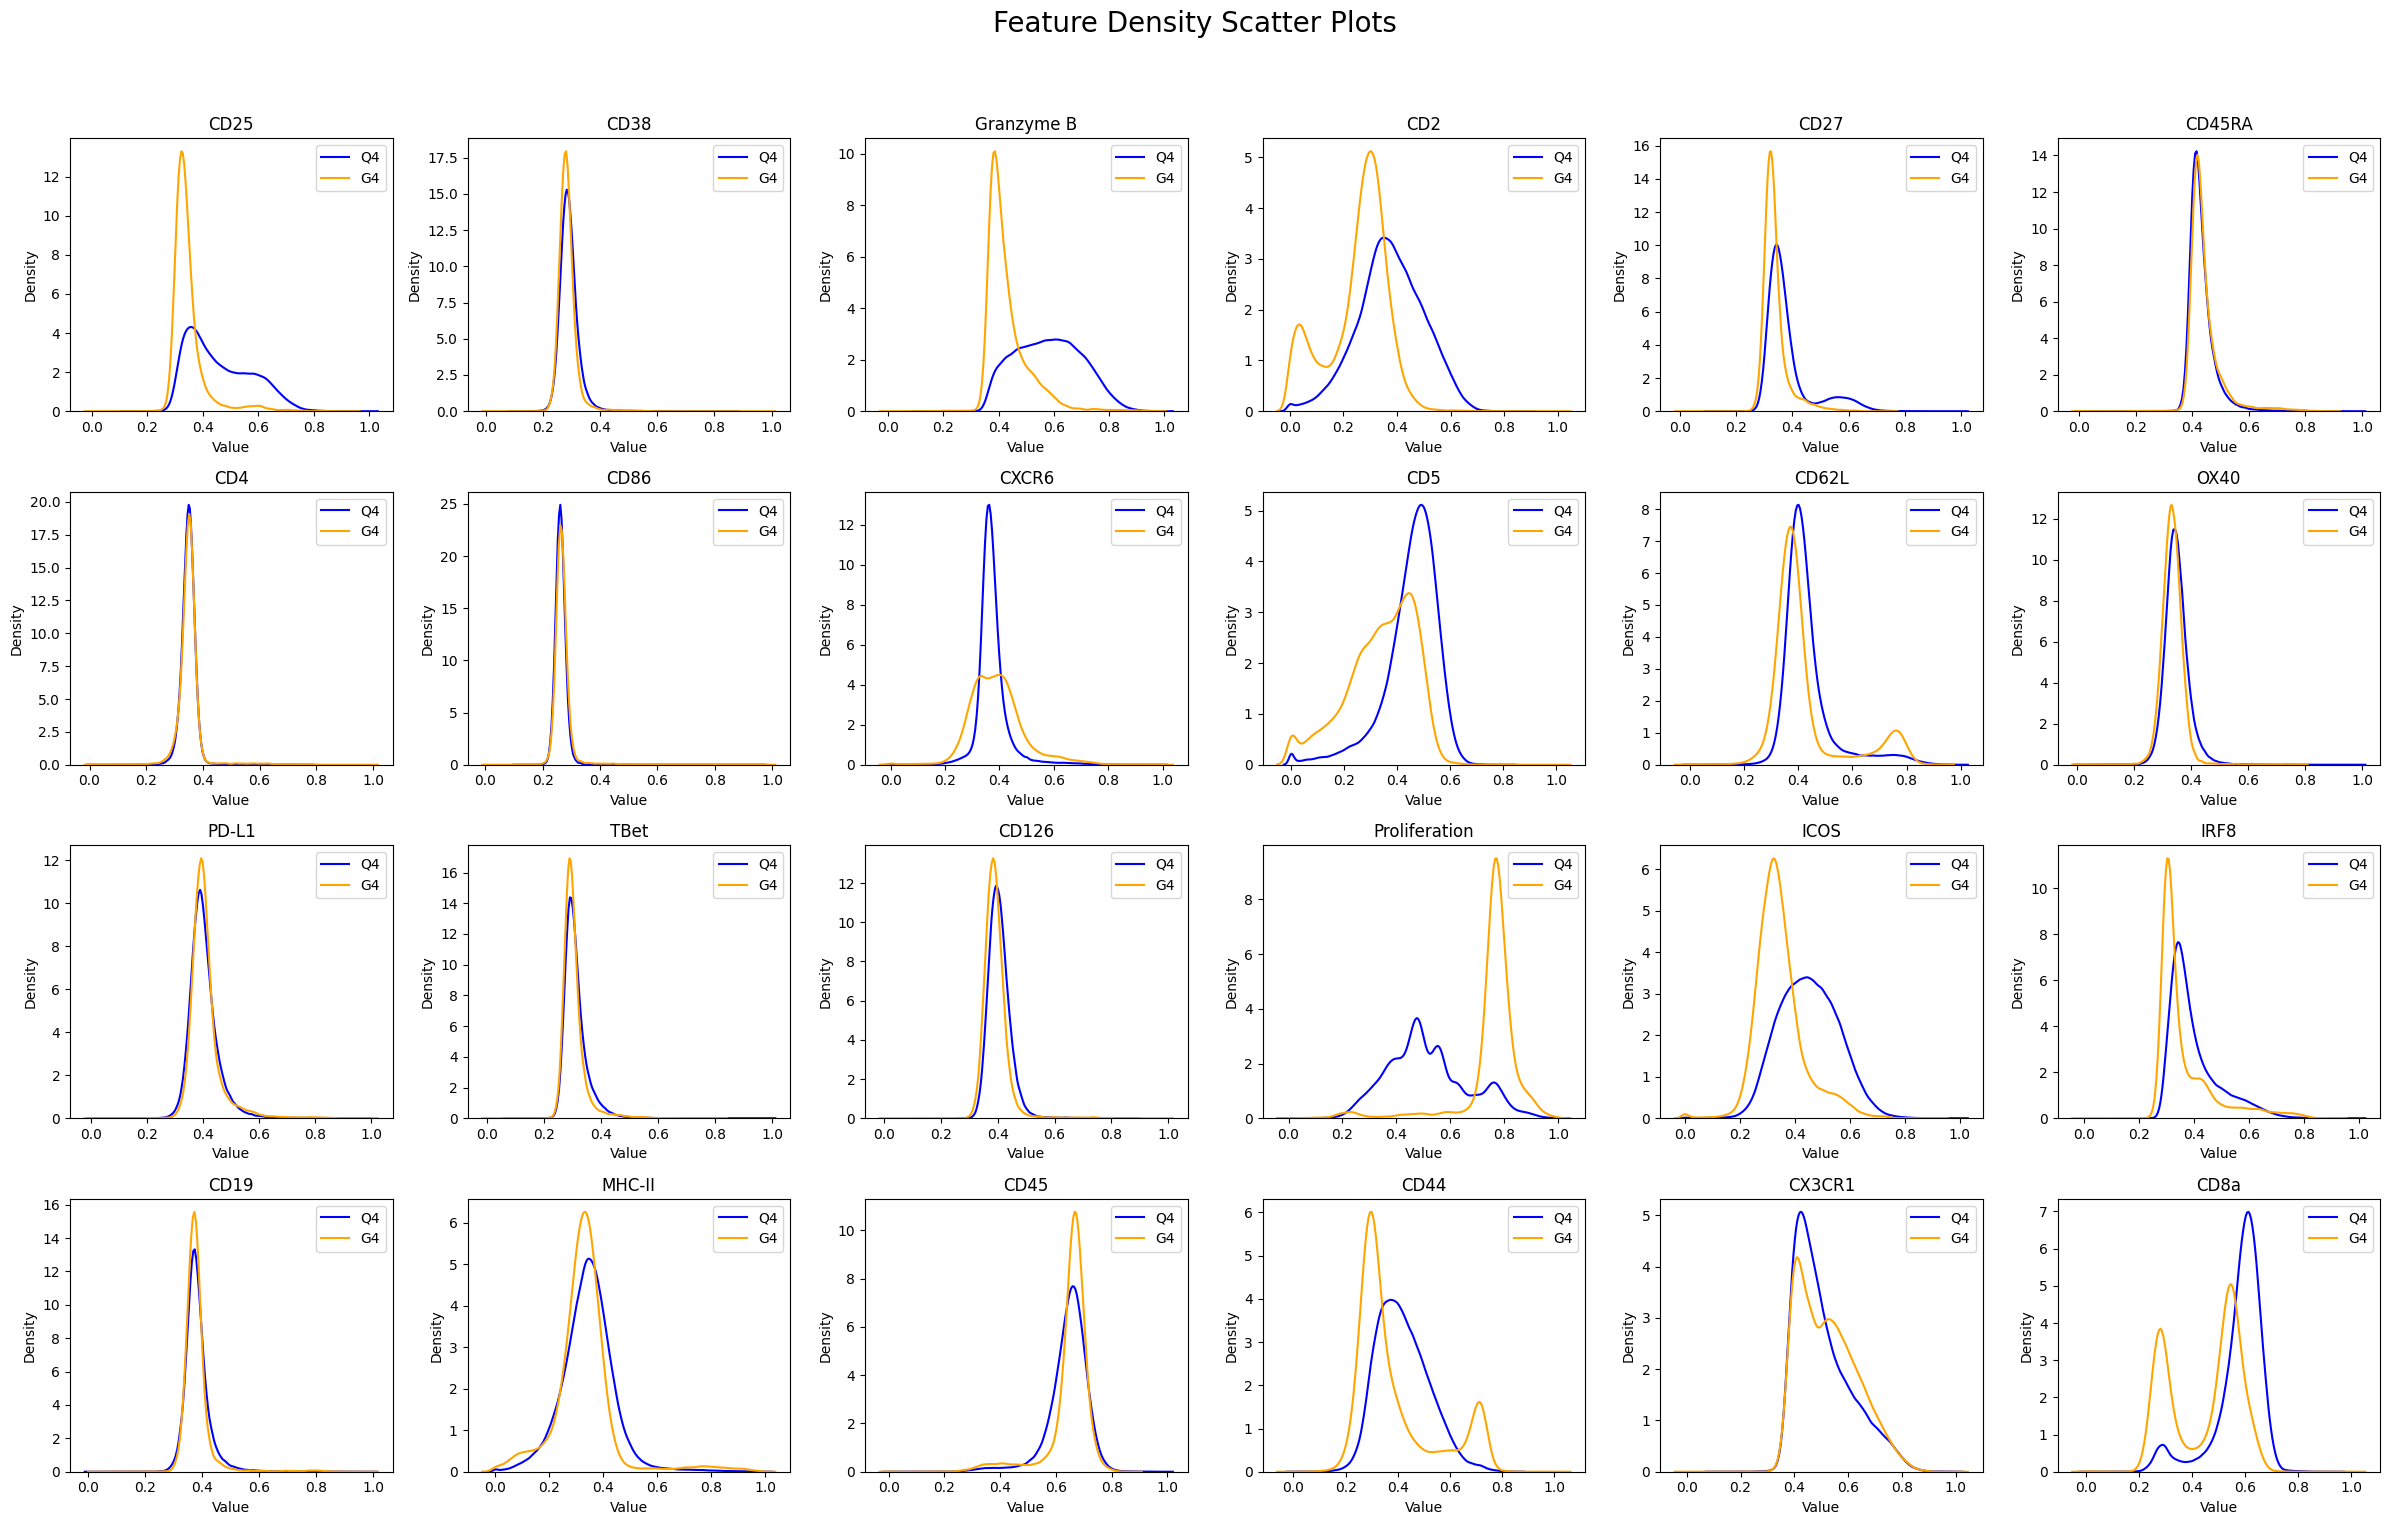

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
dataset1 = comp_2_6_2[comp_2_6_2["Peptide"]==0].drop("Peptide", axis=1)
dataset2 = comp_2_6_2[comp_2_6_2["Peptide"]==1].drop("Peptide", axis=1)

features = dataset1.columns

warnings.filterwarnings("ignore")

fig, axes = plt.subplots(4, 6, figsize=(24, 16))
fig.suptitle('Feature Density Scatter Plots', fontsize=20)

# Iterate over features and create scatter plots
for i, feature in enumerate(features):
  row, col = divmod(i, 6)
  ax = axes[row, col]
  sns.kdeplot(dataset1[feature], ax=ax, label='Q4', color='blue', shade=False)
  sns.kdeplot(dataset2[feature], ax=ax, label='G4', color='orange', shade=False)
  ax.set_title(feature)
  ax.set_xlabel('Value')
  ax.set_ylabel('Density')
  ax.legend()

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
